In [1]:
import psycopg2
import psycopg2.extras
import pandas as pd

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                          user = "postgres",
                                          password = "system",
                                          host = "localhost",
                                          port = "5432")
    def getConnection(self):
        print("Connection to DB established!")
        return self.connection
con = PostgresConnection().getConnection()

Connection to DB established!


In [3]:
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM star.fact_table t " \
              "JOIN star.store_dim s on s.store_key=t.store_key " \
                "JOIN star.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY CUBE (s.division) "\
                "ORDER BY s.division "
cur.execute(select_stmt)
q1 = cur.fetchall()
q1

[('BARISAL                                           ', Decimal('638101.00')),
 ('CHITTAGONG                                        ', Decimal('1665138.00')),
 ('DHAKA                                             ', Decimal('3440676.25')),
 ('KHULNA                                            ', Decimal('952049.75')),
 ('RAJSHAHI                                          ', Decimal('1041201.25')),
 ('RANGPUR                                           ', Decimal('721057.50')),
 ('SYLHET                                            ', Decimal('465256.75')),
 (None, Decimal('8923480.50'))]

In [4]:
df = pd.DataFrame(list(q1), columns=['division', 'sales'])

In [5]:
df['sales'] = df['sales'].astype('float64')

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt

In [8]:
df1=df.drop([7])

In [9]:
df1

,division,sales
0,BARISAL ...,638101.00
1,CHITTAGONG ...,1665138.00
2,DHAKA ...,3440676.25
3,KHULNA ...,952049.75
4,RAJSHAHI ...,1041201.25
5,RANGPUR ...,721057.50
6,SYLHET ...,465256.75


In [11]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np

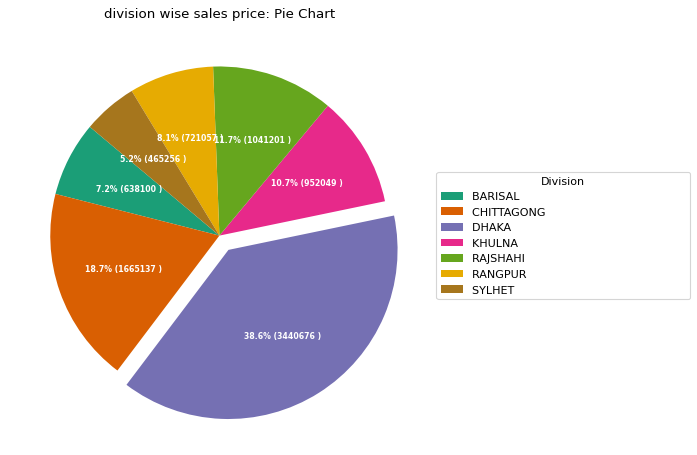

In [11]:

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df1['sales']
categories = df1['division']
explode = [0,0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Division", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=7, weight=700)
ax.set_title("division wise sales price: Pie Chart")
plt.show()

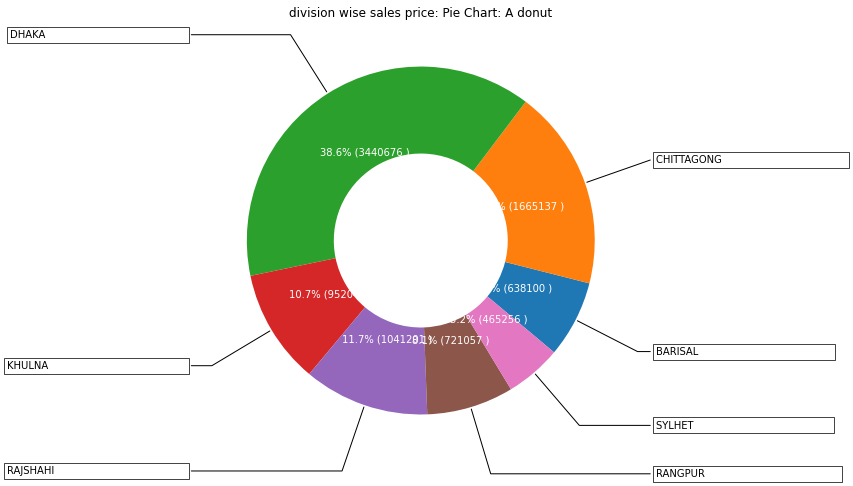

In [12]:
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(aspect="equal"))

data = df1['sales']
categories = df1['division']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                 wedgeprops=dict(width=0.5) ,
                                 startangle=-40)



#wedges, texts = ax.pie(data,wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(categories[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("division wise sales price: Pie Chart: A donut")

plt.show()

# Q1

In [13]:
con = PostgresConnection().getConnection()
insert_stmts = """SELECT store_dim.district as "District", SUM(fact_table.total_price) "Generated_revenue" 
FROM star.fact_table 
JOIN star.store_dim ON
store_dim.store_key = fact_table.store_key 
GROUP BY CUBE(store_dim.district) 
ORDER BY store_dim.district"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmts)
q2 = cur.fetchall()
q2

Connection to DB established!


[('BAGERHAT                                          ', Decimal('1307651.00')),
 ('BANDARBAN                                         ', Decimal('995360.75')),
 ('BARGUNA                                           ', Decimal('869041.00')),
 ('BARISAL                                           ', Decimal('2897237.75')),
 ('BHOLA                                             ', Decimal('1012205.75')),
 ('BOGRA                                             ', Decimal('1716452.75')),
 ('BRAHMANBARIA                                      ', Decimal('1328234.25')),
 ('CHANDPUR                                          ', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ                                  ', Decimal('739447.50')),
 ('CHITTAGONG                                        ', Decimal('7292985.50')),
 ('CHUADANGA                                         ', Decimal('563909.75')),
 ('COMILLA                                           ', Decimal('2286898.25')),
 ("COX'S BAZAR                              

In [14]:
df2 = pd.DataFrame(list(q2), columns=['district', 'Generated_revenue'])

In [15]:
df2['Generated_revenue'] = df2['Generated_revenue'].astype('float64')

In [16]:
df2

,district,Generated_revenue
0,BAGERHAT ...,1.307651e+06
1,BANDARBAN ...,9.953608e+05
2,BARGUNA ...,8.690410e+05
3,BARISAL ...,2.897238e+06
4,BHOLA ...,1.012206e+06
...,...,...
60,SUNAMGANJ ...,1.593774e+06
61,SYLHET ...,1.727717e+06
62,TANGAIL ...,1.774650e+06
63,THAKURGAON ...,7.299342e+05


In [17]:
df2=df2.drop([64])

In [18]:
df2

,district,Generated_revenue
0,BAGERHAT ...,1307651.00
1,BANDARBAN ...,995360.75
2,BARGUNA ...,869041.00
3,BARISAL ...,2897237.75
4,BHOLA ...,1012205.75
...,...,...
59,SIRAJGANJ ...,1295100.75
60,SUNAMGANJ ...,1593774.00
61,SYLHET ...,1727717.25
62,TANGAIL ...,1774650.25


In [28]:
pip install seaborn

     -------------------------------------- 292.8/292.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 38.6/38.6 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
import seaborn as sns

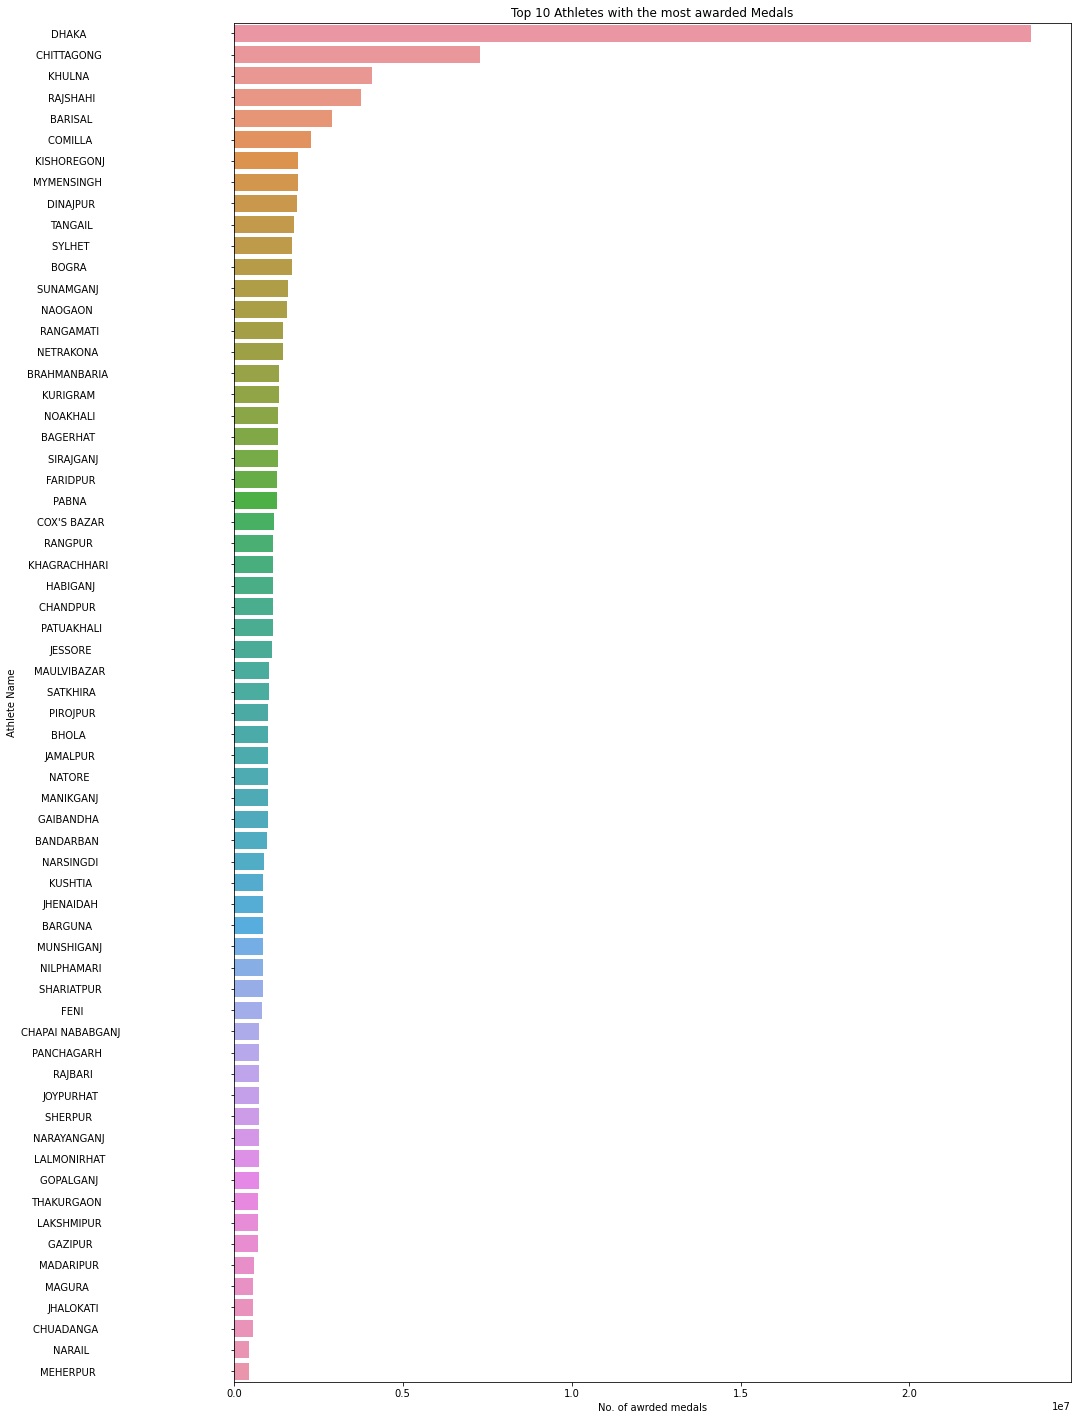

In [66]:
district_order = df2['district']
plt.figure(figsize=(15, 25))
sns.barplot(data=df2,x='Generated_revenue',y='district',order=df2.sort_values('Generated_revenue',ascending = False).district)
sns.color_palette("mako", as_cmap=True)
plt.title('Top 10 Athletes with the most awarded Medals')
plt.xlabel('No. of awrded medals')
plt.ylabel('Athlete Name');

In [12]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT time_dim.year as "Year", SUM(fact_table.total_price) "Generated_revenue" 
FROM star.fact_table 
JOIN star.time_dim ON
time_dim.time_key = fact_table.time_key 
GROUP BY time_dim.year
ORDER BY time_dim.year"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
yearwise_income = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\Arifurk\myenv\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [13]:
yearwise_income


,Year,Generated_revenue
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25


In [14]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT time_dim.month as "Month", SUM(fact_table.total_price) "Generated_revenue" 
FROM star.fact_table 
JOIN star.time_dim ON
time_dim.time_key = fact_table.time_key 
GROUP BY time_dim.month
ORDER BY time_dim.month"""
cur = con.cursor()
monthwise_income = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\Arifurk\myenv\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [15]:
monthwise_income

,Month,Generated_revenue
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75
